In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
from qutip import *
from scipy.optimize import curve_fit
from scipy.integrate import odeint
from scipy.integrate import simpson
plt.rcParams.update({'font.size': 14})

In [2]:
omega=1
q0=3
x0=3
p0=3

In [3]:
x=np.linspace(-8,+8,200)
p=np.linspace(-8,+8,200)

In [4]:
def coper(N,q0,myu):
    cops=[]
    a=destroy(N)
    adag=a.dag()
    zeta=myu/12
    beta=myu/24
    eta=myu*(q0**2-1)/4
    const1=myu*(q0**2-1)
    const2=3*myu/4
    c1=sqrt(const1)*adag
    c2=sqrt(const2)*a**2
    c3=sqrt(myu)*(adag*a-0.5*adag**2)
    cops.append(c1)
    cops.append(c2)
    cops.append(c3)
    return cops
def hamil(N,omega,q0,myu):
    a=destroy(N)
    adag=a.dag()
    zeta=myu/12
    beta=myu/24
    eta=myu*(q0**2-1)/4
    H=omega*adag*a+(1j*zeta*(adag*a**3-(adag**3)*a))+(1j*beta*(a**4-adag**4))-(1j*eta*(a**2-adag**2))
    return H
def retdiag(rho,N):
    rhoii=[]
    n=[]
    for i in range(N):
        rhoii.append(rho.diag())
        n.append(i+1)
    return n,rhoii
def retdens(H,cops,N):
    expop=rand_dm(N)
    times = np.linspace(0.0, 100.0, 1000)
    result_dm = mesolve(H, expop, times, cops)
    return result_dm.states    
def hamildriven(N,omega,q0,myu,n,omega1,epsilon,phi):
    T=2*np.pi/omega1
    t=np.linspace(0,1000,1000)
    t=t*T
    a=destroy(N)
    adag=a.dag()
    zeta=myu/12
    beta=myu/24
    eta=myu*(q0**2-1)/4
    H=[]
    for i in range (len(t)):
        H.append(omega*adag*a+(1j*zeta*(adag*a**3-(adag**3)*a))+(1j*beta*(a**4-adag**4))-(1j*eta*(a**2-adag**2))-(1j*epsilon*t[i]*(a+adag)))
    return H    
    #H=omega*adag*a+(1j*zeta*(adag*a**3-(adag**3)*a))+(1j*beta*(a**4-adag**4))-(1j*eta*(a**2-adag**2))-(cosine)
    
    return H
def Gauss(x, A, B, C):
    y = A*np.exp(-((x-B)/C)**2)
    return y
def twovdpcoper1(N,q0,myu):
    cops=[]
    a=destroy(N)
    adag=a.dag()
    I=qeye(N)
    zeta=myu/12
    beta=myu/24
    eta=myu*(q0**2-1)/4
    const1=myu*(q0**2-1)
    const2=3*myu/4
    c1=sqrt(const1)*tensor(adag,I)
    c2=sqrt(const2)*(tensor(a**2,I))
    c3=sqrt(myu)*(tensor(adag*a,I)-0.5*tensor(adag**2,I))
    cops.append(c1)
    cops.append(c2)
    cops.append(c3)
    return cops
def twovdpcoper2(N,q0,myu):
    cops=[]
    a=destroy(N)
    adag=a.dag()
    I=qeye(N)
    zeta=myu/12
    beta=myu/24
    eta=myu*(q0**2-1)/4
    const1=myu*(q0**2-1)
    const2=3*myu/4
    c1=sqrt(const1)*tensor(I,adag)
    c2=sqrt(const2)*(tensor(I,a**2))
    c3=sqrt(myu)*(tensor(I,adag*a)-0.5*tensor(I,adag**2))
    cops.append(c1)
    cops.append(c2)
    cops.append(c3)
    return cops
    
def twovdpcouplingcoper(cops1,cops2,N,D):
    cops=[]
    a=destroy(N)
    adag=a.dag()
    I=qeye(N)
    for i in range(len(cops1)):
        cops.append(cpos1[i])
    for i in range(len(cops2)):
        cops.append(cpos2[i])
    c3=sqrt(D)*(tensor(a,I)-tensor(I,a))
    cops.append(c3)
    return cops
def linexp(x,A,alpha,mean):
    y=A*(x**2)*np.exp(-(alpha)*(x-mean)**2)
    #y=A*x
    return y
def probrec(myu,q0,diag):
    N=3000
    p=np.zeros(N)
    #p[0]=np.random.uniform(0,1)
    #p[1]=np.random.uniform(0,1)
    p[0]=0
    p[1]=diag[0]
    p[2]=diag[1]
    #p[2]=np.random.uniform(0,1)
    n=0
    for i in range(N-3):
        p[i+3]=-(4/(3*myu*(n+2)))*(((-myu*(q0**2-1))*p[i+1])+((3*myu/4)*(n*p[i+2]))-((myu/4)*(n*p[i]+(n+2)*p[i+1])))
        n+=1
        
    return p
    
    
    

In [5]:
q0=3
omega=1
N=30

In [6]:
myu=0.001
H1=hamil(N,omega,q0,myu)
cops1=coper(N,q0,myu)

In [7]:
ss1=steadystate(H1,cops1)

Text(0.5, 1.0, 'myu=0.001')

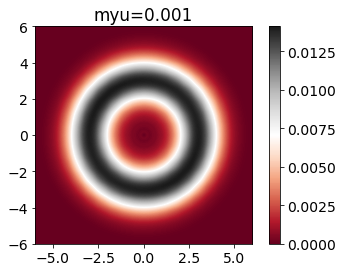

In [8]:
wc=wigner(ss1,x,p)
plt.imshow(wc, extent=[-6, 6, -6, 6], origin='lower',
           cmap='RdGy')
plt.colorbar()
plt.title('myu=0.001')

In [9]:
ss1

Quantum object: dims = [[30], [30]], shape = (30, 30), type = oper, isherm = True
Qobj data =
[[ 4.39525707e-03+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  -1.82859116e-07-1.86465451e-05j  0.00000000e+00+0.00000000e+00j
   5.51978485e-08+2.66200267e-06j  0.00000000e+00+0.00000000e+00j
  -1.11082686e-08+1.42779258e-10j  0.00000000e+00+0.00000000e+00j
   2.27464246e-10-3.05145620e-11j  0.00000000e+00+0.00000000e+00j
  -2.27973856e-14+1.73483856e-12j  0.00000000e+00+0.00000000e+00j
   2.32030323e-15+1.52521354e-13j  0.00000000e+00+0.00000000e+00j
  -2.48395833e-15+2.59678856e-16j  0.00000000e+00+0.00000000e+00j
   1.95256939e-16-3.70275851e-17j  0.00000000e+00+0.00000000e+00j
   6.49635916e-19+4.74337492e-18j  0.00000000e+00+0.00000000e+00j
  -7.89766464e-20-1.78425220e-19j  0.00000000e+00+0.00000000e+00j
   6.39937160e-21-1.34466630e-21j  0.00000000e+00+0.00000000e+00j
  -1.46801742e-22+1.36500514e-22j  0.00000000e+00+0.00000000e+00j
  -2.61939968e-24-7.91313570e-24j  0.00000000e+0

In [10]:
ss1a=ss1.full()

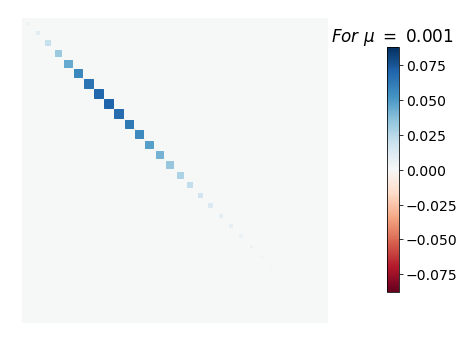

In [12]:
abs(ss1)
fig, ax = hinton(ss1,xlabels=False,ylabels=False)
plt.title(r'$For$ $\mu$ $=$ $0.001$')
plt.savefig("ssdm0.001.png",bbox_inches="tight")
plt.show()

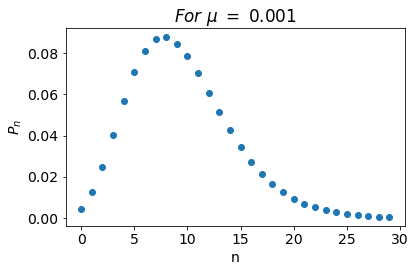

In [13]:
n=np.linspace(0,29,30)
plt.scatter(n, ss1.diag())
plt.ylabel(r'$P_n$')
plt.xlabel('n')
plt.title(r'$For$ $\mu$ $=$ $0.001$')
plt.tight_layout()
plt.savefig("pvsn0.001.png")

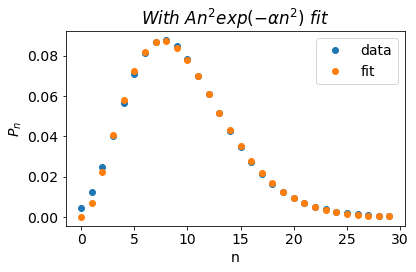

In [14]:
n=np.linspace(0,29,30)
guess=np.random.rand(3)
#parameters1, covariance1 = curve_fit(Gauss, n, ss1.diag())
parameters1, covariance1 = curve_fit(linexp, n, ss1.diag(),p0=guess,maxfev=5000)
fit_A = parameters1[0]
fit_B = parameters1[1]
fit_C=parameters1[2]
#fit_C=parameters1[2]
#fit_y = Gauss(n, fit_A, fit_B,fit_C)
fit_y = linexp(n, fit_A,fit_B,fit_C)
plt.plot(n, ss1.diag(), 'o', label='data')
#plt.plot(log(n),log(ss1.diag()) ,'o', label='data')
plt.plot(n, fit_y, 'o', label='fit')
plt.legend()
plt.ylabel(r'$P_n$')
plt.xlabel('n')
plt.title(r'$With$ $An^2exp(-\alpha n^2)$ $fit$')
plt.tight_layout()
plt.savefig("pvsnwithfit0.001.png")

In [16]:
parameters1

array([ 2.91779437e-02,  5.88618581e-03, -1.48179122e+01])

In [17]:
max(ss1.diag())

0.08786491001845814

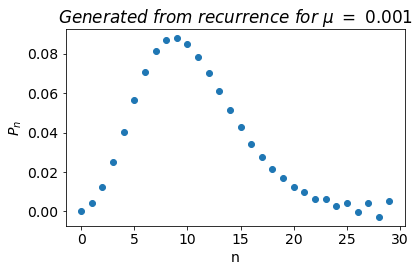

In [18]:
prob=probrec(0.001,q0,ss1.diag())
prob
plt.scatter(n,prob[0:30])
plt.ylabel(r'$P_n$')
plt.xlabel('n')
plt.title(r'$Generated$ $from$ $recurrence$ $for$ $\mu$ $=$ $0.001$')
plt.tight_layout()
plt.savefig("recpvsn0.001.png")

In [51]:
type(prob)

numpy.ndarray

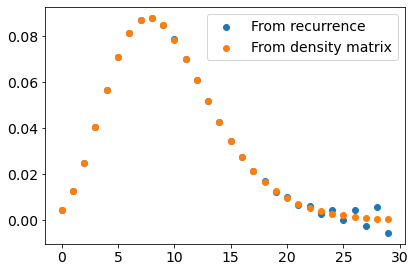

In [19]:
probshift=np.zeros(len(prob))
probshift[0]=prob[1]
for i in range(len(prob)-1):
    probshift[i]=prob[i+1]
plt.scatter(n,probshift[0:30],label='From recurrence')
plt.scatter(n,ss1.diag(),label='From density matrix')
plt.tight_layout()
plt.legend()

In [20]:
max(prob[0:30])

0.08787271806308633

In [21]:
max(ss1.diag())

0.08786491001845814

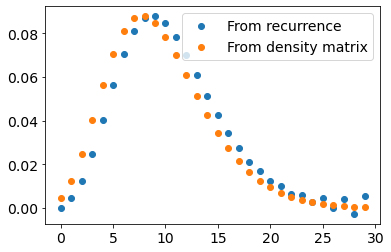

In [22]:
plt.scatter(n,prob[0:30],label='From recurrence')
plt.scatter(n,ss1.diag(),label='From density matrix')
plt.legend()

In [23]:
sum(ss1.diag())

1.0000000000000002

In [58]:
sum(prob[0:30])

1.0021959974860883

In [59]:
np.sum(n[0:29]*probshift[0:29])

9.545315924939604

In [60]:
area = simpson(prob[0:30], dx=1)
print("area =", area)

area = 0.9991406605640968


In [61]:
np.sum(n*ss1.diag())

9.48400755929084

In [15]:
myu=0.02
H2=hamil(N,omega,q0,myu)
cops2=coper(N,q0,myu)
ss2=steadystate(H2,cops2)

Text(0.5, 1.0, 'myu=0.02')

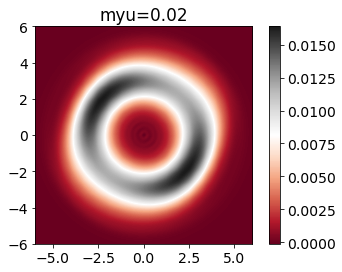

In [16]:
wc=wigner(ss2,x,p)
plt.imshow(wc, extent=[-6, 6, -6, 6], origin='lower',
           cmap='RdGy')
plt.colorbar()
plt.title('myu=0.02')

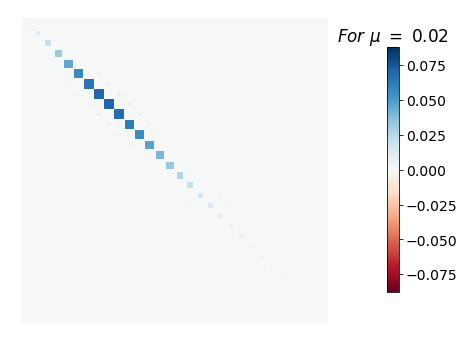

In [17]:
abs(ss2)
fig, ax = hinton(ss2,xlabels=False,ylabels=False)
plt.title(r'$For$ $\mu$ $=$ $0.02$')
plt.savefig("ssdm0.02.png",bbox_inches="tight")
plt.show()

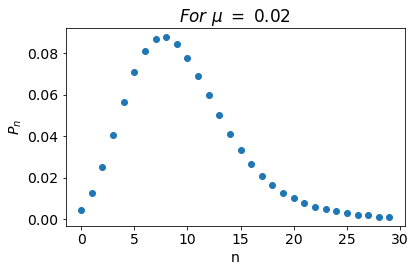

In [18]:
n=np.linspace(0,29,30)
plt.scatter(n, ss2.diag())
plt.ylabel(r'$P_n$')
plt.xlabel('n')
plt.title(r'$For$ $\mu$ $=$ $0.02$')
plt.tight_layout()
plt.savefig("pvsn0.02.png")

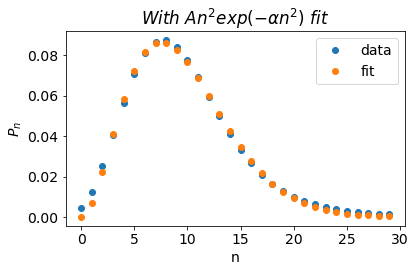

In [19]:
n=np.linspace(0,29,30)
guess=np.random.rand(3)
#parameters1, covariance1 = curve_fit(Gauss, n, ss1.diag())
parameters2, covariance2 = curve_fit(linexp, n, ss2.diag(),p0=guess)
fit_A = parameters2[0]
fit_B = parameters2[1]
fit_C=parameters2[2]
#fit_C=parameters1[2]
#fit_y = Gauss(n, fit_A, fit_B,fit_C)
fit_y = linexp(n, fit_A,fit_B,fit_C)
plt.plot(n, ss2.diag(), 'o', label='data')
#plt.plot(log(n),log(ss1.diag()) ,'o', label='data')
plt.plot(n, fit_y, 'o', label='fit')
plt.legend()
plt.ylabel(r'$P_n$')
plt.xlabel('n')
plt.title(r'$With$ $An^2exp(-\alpha n^2)$ $fit$')
plt.tight_layout()
plt.savefig("pvsnwithfit0.02.png")

In [30]:
parameters2

array([ 3.68619141e-02,  5.57181294e-03, -1.63660711e+01])

In [20]:
myu=0.05
H3=hamil(N,omega,q0,myu)
cops3=coper(N,q0,myu)
ss3=steadystate(H3,cops3)

Text(0.5, 1.0, 'myu=0.05')

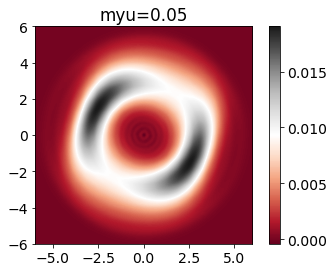

In [21]:
wc=wigner(ss3,x,p)
plt.imshow(wc, extent=[-6, 6, -6, 6], origin='lower',
           cmap='RdGy')
plt.colorbar()
plt.title('myu=0.05')

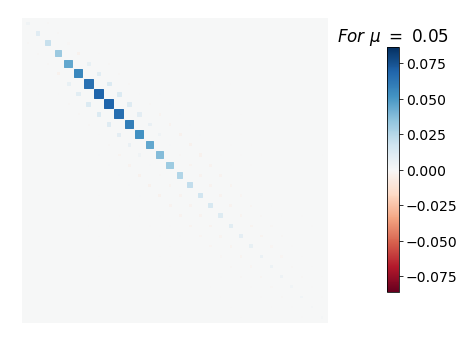

In [23]:
abs(ss3)
fig, ax = hinton(ss3,xlabels=False,ylabels=False)
plt.title(r'$For$ $\mu$ $=$ $0.05$')
plt.savefig("ssdm0.05.png",bbox_inches="tight")
plt.show()

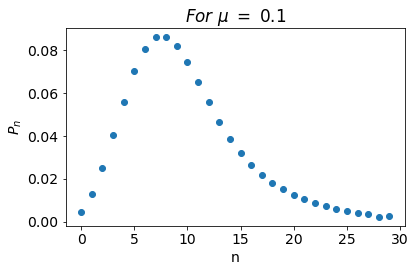

In [24]:
n=np.linspace(0,29,30)
plt.scatter(n, ss3.diag())
plt.ylabel(r'$P_n$')
plt.xlabel('n')
plt.title(r'$For$ $\mu$ $=$ $0.1$')
plt.tight_layout()
plt.savefig("pvsn0.1.png")

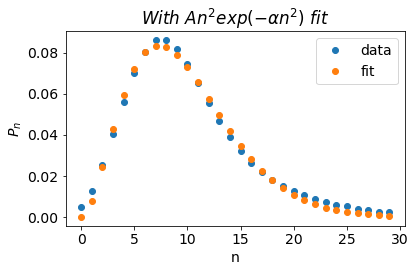

In [25]:
n=np.linspace(0,29,30)
guess=np.random.rand(3)
#parameters1, covariance1 = curve_fit(Gauss, n, ss1.diag())
parameters3, covariance3 = curve_fit(linexp, n, ss3.diag(),p0=guess)
fit_A = parameters3[0]
fit_B = parameters3[1]
fit_C=parameters3[2]
#fit_C=parameters1[2]
#fit_y = Gauss(n, fit_A, fit_B,fit_C)
fit_y = linexp(n, fit_A,fit_B,fit_C)
plt.plot(n, ss3.diag(), 'o', label='data')
#plt.plot(log(n),log(ss1.diag()) ,'o', label='data')
plt.plot(n, fit_y, 'o', label='fit')
plt.legend()
plt.ylabel(r'$P_n$')
plt.xlabel('n')
plt.title(r'$With$ $An^2exp(-\alpha n^2)$ $fit$')
plt.tight_layout()
plt.savefig("pvsnwithfit0.05.png")

In [37]:
parameters3

array([ 2.41960353e-01,  3.71092436e-03, -2.95460503e+01])

In [27]:
myu=0.1
H4=hamil(N,omega,q0,myu)
cops4=coper(N,q0,myu)
ss4=steadystate(H4,cops4)

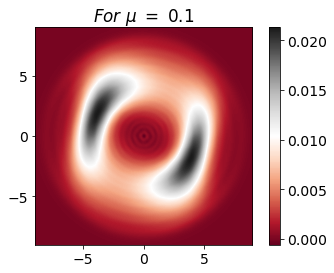

In [28]:
wc=wigner(ss4,x,p)
plt.imshow(wc, extent=[-9, 9, -9, 9], origin='lower',
           cmap='RdGy')
plt.colorbar()
plt.title(r'$For$ $\mu$ $=$ $0.1$')
plt.savefig("ssdm0.1.png")
plt.show()

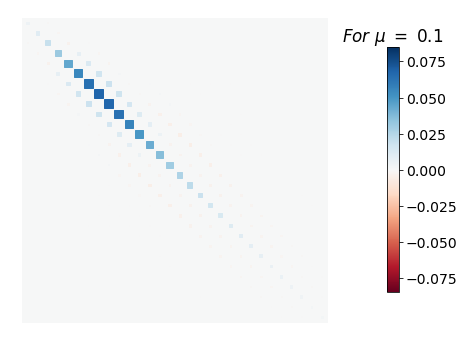

In [29]:
abs(ss4)
fig, ax = hinton(ss4,xlabels=False,ylabels=False)
plt.title(r'$For$ $\mu$ $=$ $0.1$')
plt.savefig("ssdm0.1.png",bbox_inches="tight")
plt.show()

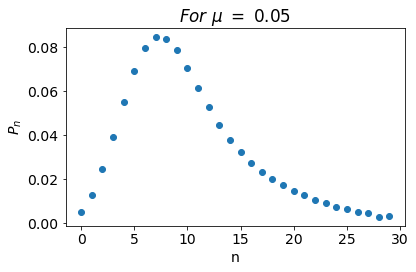

In [30]:
n=np.linspace(0,29,30)
plt.scatter(n, ss4.diag())
plt.ylabel(r'$P_n$')
plt.xlabel('n')
plt.title(r'$For$ $\mu$ $=$ $0.05$')
plt.tight_layout()
plt.savefig("pvsn0.05.png")

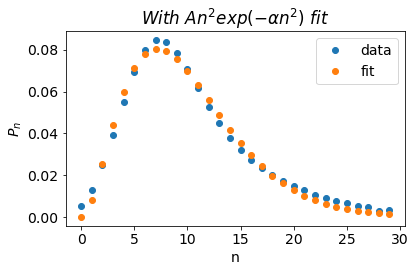

In [31]:
n=np.linspace(0,29,30)
guess=np.random.rand(3)
#parameters1, covariance1 = curve_fit(Gauss, n, ss1.diag())
parameters4, covariance4 = curve_fit(linexp, n, ss4.diag(),p0=guess)
fit_A = parameters4[0]
fit_B = parameters4[1]
fit_C=parameters4[2]
#fit_C=parameters1[2]
#fit_y = Gauss(n, fit_A, fit_B,fit_C)
fit_y = linexp(n, fit_A,fit_B,fit_C)
plt.plot(n, ss4.diag(), 'o', label='data')
#plt.plot(log(n),log(ss1.diag()) ,'o', label='data')
plt.plot(n, fit_y, 'o', label='fit')
plt.legend()
plt.ylabel(r'$P_n$')
plt.xlabel('n')
plt.title(r'$With$ $An^2exp(-\alpha n^2)$ $fit$')
plt.tight_layout()
plt.savefig("pvsnwithfit0.1.png")

In [124]:
parameters4

array([ 8.86022327e+01,  1.78839260e-03, -7.10612818e+01])

#prob=probrec(0.1,q0,ss4.diag())
np.set_printoptions(threshold=np.inf)
guess=np.random.rand(3)
parameters, covariance = curve_fit(linexp, n, prob,p0=guess,maxfev=50000)
fit_A = parameters[0]
fit_B = parameters[1]
fit_C=parameters[2]
fit_y = linexp(n, fit_A,fit_B,fit_C)
plt.plot(n, prob, 'o', label='data')
plt.plot(n, fit_y, 'o', label='fit')
plt.legend()

In [48]:
q0

3

In [49]:
dm1=retdens(H1,cops1,N)
dm2=retdens(H2,cops2,N)
dm4=retdens(H4,cops4,N)

In [50]:
#for small myu
dm1a=dm1[0]
dm1b=dm1[20]
dm1c=dm1[90]
dm1d=dm1[500]


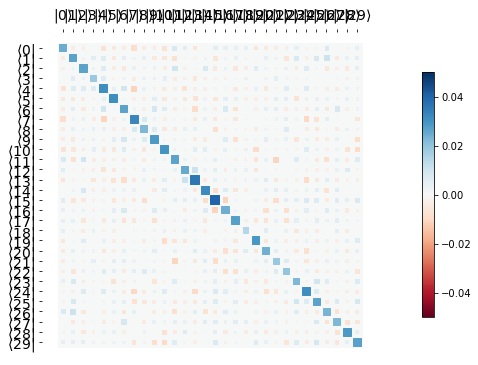

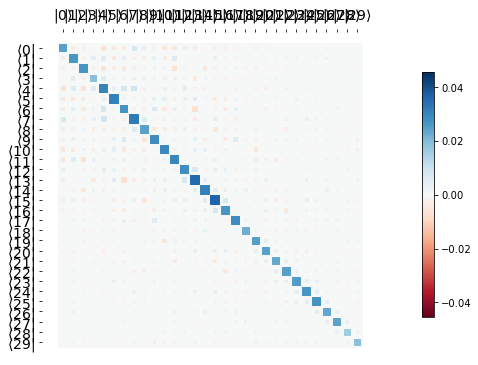

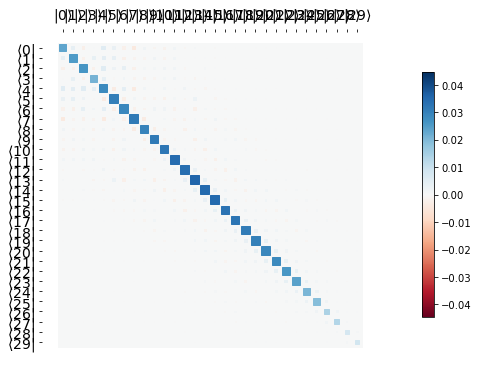

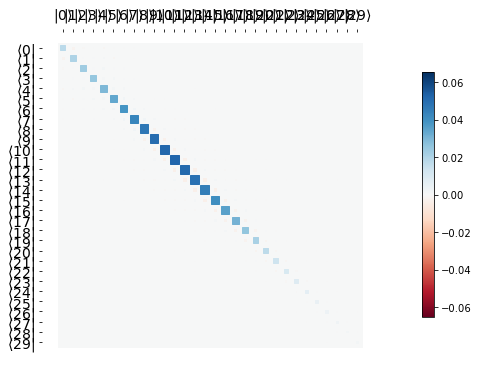

In [51]:
abs(dm1a)
fig1, ax1 = hinton(dm1a)
abs(dm1b)
fig1, ax1 = hinton(dm1b)
abs(dm1c)
fig1, ax1 = hinton(dm1c)
abs(dm1d)
fig1, ax1 = hinton(dm1d)
plt.show()

In [52]:
#for large myu
dm4a=dm4[0]
dm4b=dm4[20]
dm4c=dm4[90]
dm4d=dm4[500]


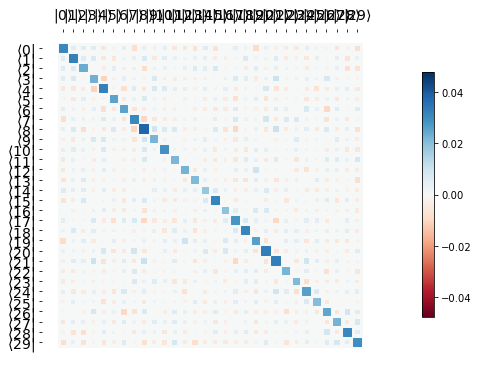

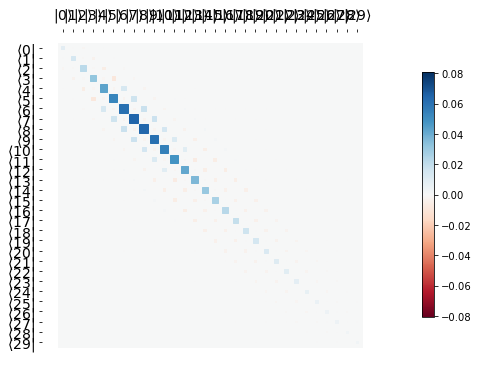

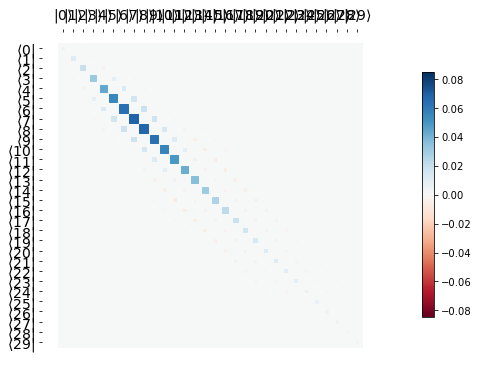

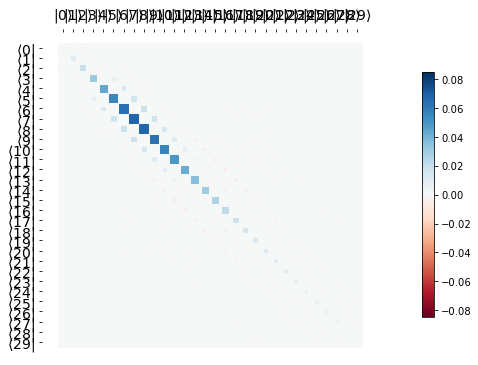

In [53]:
abs(dm4a)
fig1, ax1 = hinton(dm4a)
abs(dm4b)
fig1, ax1 = hinton(dm4b)
abs(dm4c)
fig1, ax1 = hinton(dm4c)
abs(dm4d)
fig1, ax1 = hinton(dm4d)
plt.show()

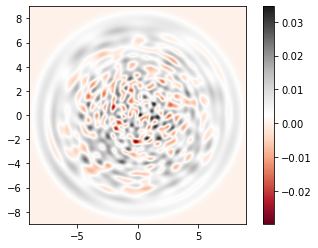

In [54]:
wc=wigner(dm4a,x,p)
plt.imshow(wc, extent=[-9, 9, -9, 9], origin='lower',
           cmap='RdGy')
plt.colorbar()

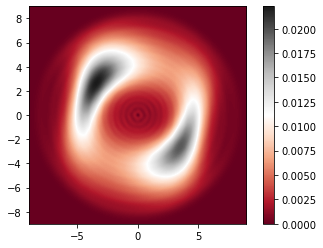

In [55]:
wc=wigner(dm4b,x,p)
plt.imshow(wc, extent=[-9, 9, -9, 9], origin='lower',
           cmap='RdGy')
plt.colorbar()

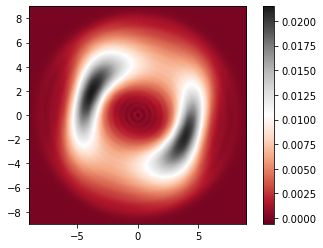

In [56]:
wc=wigner(dm4c,x,p)
plt.imshow(wc, extent=[-9, 9, -9, 9], origin='lower',
           cmap='RdGy')
plt.colorbar()

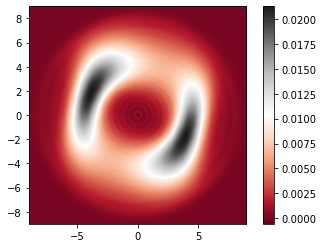

In [57]:
wc=wigner(dm4d,x,p)
plt.imshow(wc, extent=[-9, 9, -9, 9], origin='lower',
           cmap='RdGy')
plt.colorbar()

Text(0.5, 1.0, 'For myu=0.001')

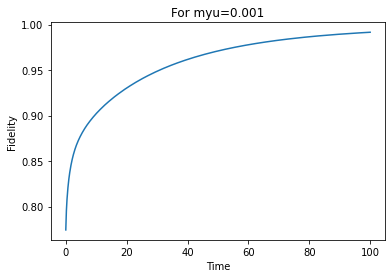

In [58]:
fid=[]
times = np.linspace(0.0, 100.0, 1000)
for i in range(len(dm1)):
    fid.append(fidelity(dm1[i],ss1))
plt.plot(times,fid)
plt.ylabel('Fidelity')
plt.xlabel('Time')
plt.title('For myu=0.001')

Text(0.5, 1.0, 'For myu=0.02')

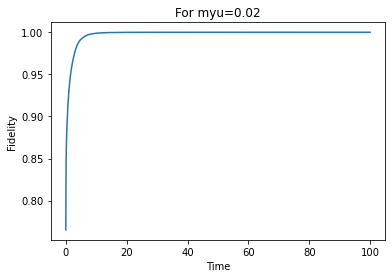

In [59]:
fid=[]
times = np.linspace(0.0, 100.0, 1000)
for i in range(len(dm2)):
    fid.append(fidelity(dm2[i],ss2))
plt.plot(times,fid)
plt.ylabel('Fidelity')
plt.xlabel('Time')
plt.title('For myu=0.02')

Text(0.5, 1.0, 'For myu=0.1')

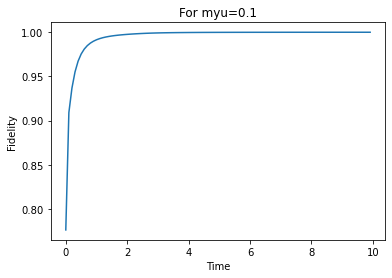

In [60]:
fid=[]
times = np.linspace(0.0, 100.0, 1000)
for i in range(len(dm4)):
    fid.append(fidelity(dm4[i],ss4))
plt.plot(times[0:100],fid[0:100])
plt.ylabel('Fidelity')
plt.xlabel('Time')
plt.title('For myu=0.1')

Text(0.5, 1.0, 'For myu=0.1')

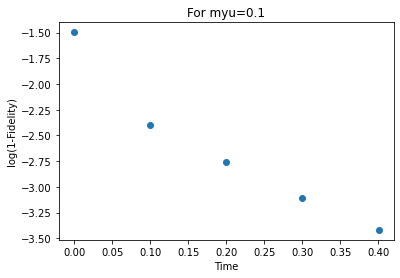

In [61]:
one=np.ones(len(fid))
log(one-fid)
plt.scatter(times[0:5],log(one[0:5]-fid[0:5]))
plt.ylabel('log(1-Fidelity)')
plt.xlabel('Time')
plt.title('For myu=0.1')

In [62]:
taulist=np.linspace(0,10000,10000)
wlist1 = np.linspace(0,1.4, 10000)
a=destroy(N)
adag=a.dag()

In [63]:
#corr1=correlation_2op_1t(H3, ss3, taulist, cops1, adag, a, reverse=True)
#wlist1, spec1 = spectrum_correlation_fft(taulist, corr1)
spec1 = spectrum(H3, wlist1, cops3, a.dag(), a)


In [64]:
for i in range(len(spec1)):
    if spec1[i]==max(spec1):
        w=wlist1[i]
        break
w

0.9963396339633963

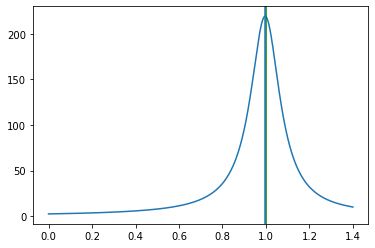

In [65]:
plt.plot(wlist1,spec1)
plt.axvline(omega,color='g')
plt.axvline(w)